In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

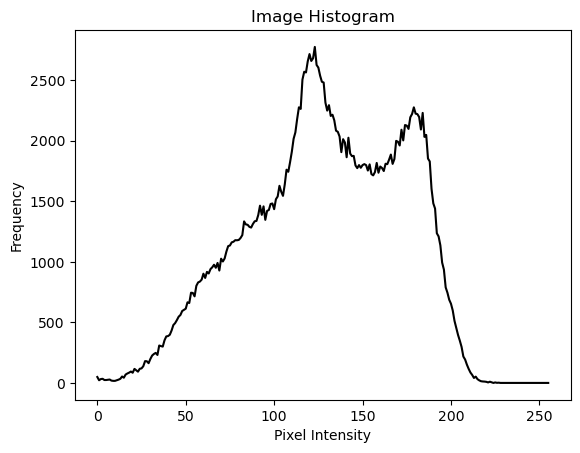

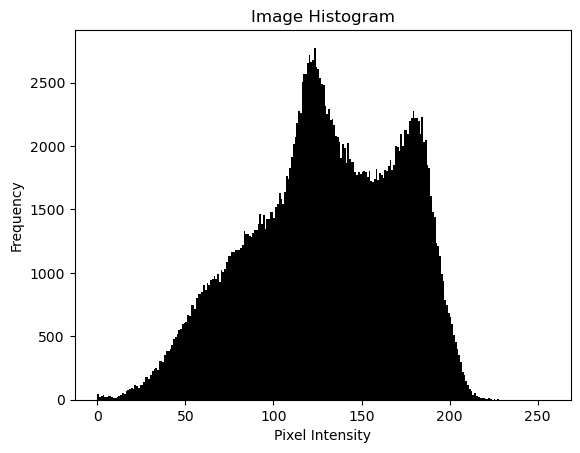

In [5]:
# Load the image in grayscale mode
image = cv2.imread('../IMAGES/Gbaboon.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(histogram, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()


# Plot the histogram
plt.hist(image.ravel(), 256, [0, 256], color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()



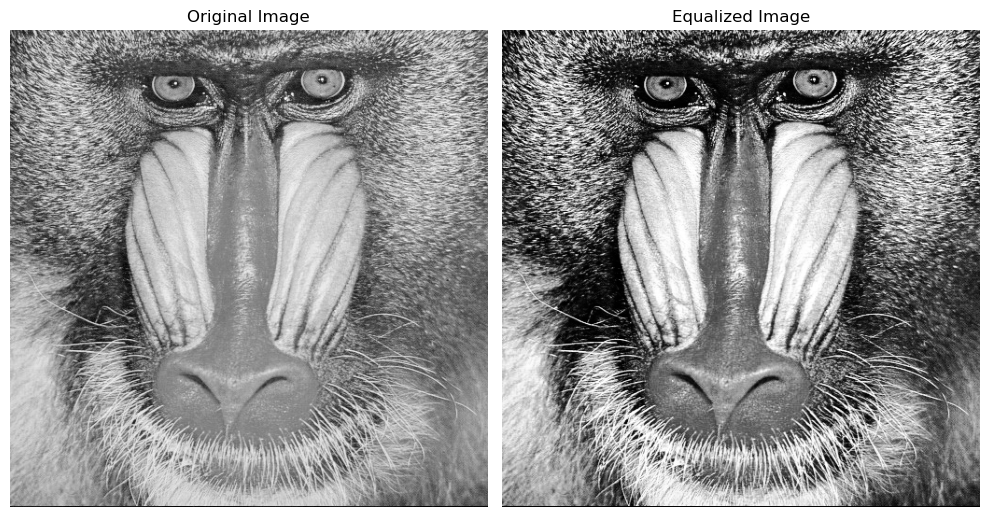

In [8]:
def histogram_equalization(image):
    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(image)
    return equalized_image


# Perform histogram equalization
equalized_image = histogram_equalization(image)

# Plot original and equalized images
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
def histogram_equalization(image):
  # Calculate histogram (frequency of each intensity level)
    histogram = np.zeros(256, dtype=np.uint8)  # Initialize histogram with zeros
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogram[image[i, j]] += 1  # Increment count for each intensity value
    
  # Calculate cumulative distribution function (CDF)
    cdf = np.zeros(256, dtype=np.float32)  # Initialize CDF with zeros
    cdf[0] = histogram[0] / (image.size)  # Normalize for probability
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + histogram[i] / (image.size)
    
  # Perform intensity mapping for equalization
    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = image[i, j]
            new_intensity = int(cdf[pixel_value] * 255)  # Map intensity based on CDF
            equalized_image[i, j] = new_intensity

    return equalized_image

equalized_image_2 = histogram_equalization(image)

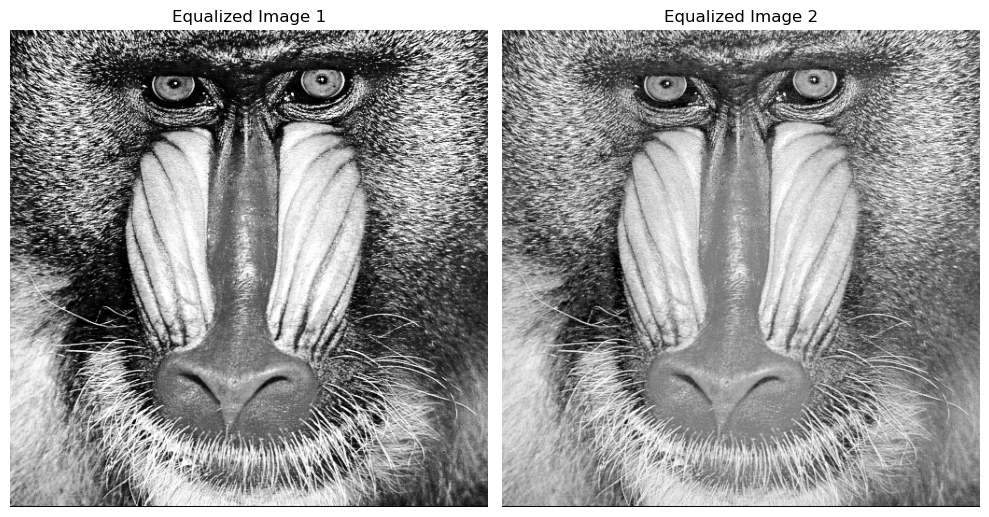

In [12]:
plt.figure(figsize=(10, 6))

# plt.subplot(1, 2, 1)
# plt.imshow(image, cmap='gray')
# plt.title('Original Image')
# plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_2, cmap='gray')
plt.title('Equalized Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
def histogram_matching(image1, image2):
    
  # Calculate histograms for both images
    hist1 = np.zeros(256, dtype=np.uint8)  # Initialize histograms with zeros
    hist2 = np.zeros(256, dtype=np.uint8)
    
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            pixel_value1 = image1[i, j]
            hist1[pixel_value1] += 1
            pixel_value2 = image2[i, j]
            hist2[pixel_value2] += 1

  # Calculate cumulative distribution functions (CDFs)
    cdf1 = np.zeros(256, dtype=np.float32)  # Initialize CDFs with zeros
    cdf2 = np.zeros(256, dtype=np.float32)
    cdf1[0] = hist1[0] / (image1.size)  # Normalize for probability
    cdf2[0] = hist2[0] / (image2.size)
    for i in range(1, 256):
        cdf1[i] = cdf1[i-1] + hist1[i] / (image1.size)
        cdf2[i] = cdf2[i-1] + hist2[i] / (image2.size)

  # Perform intensity mapping for matching
    matched_image = np.zeros_like(image1)
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            pixel_value = image1[i, j]
          # Find the closest intensity in image2 based on CDF
            new_intensity = np.argmin(np.abs(cdf2 - cdf1[pixel_value]))
            matched_image[i, j] = new_intensity

    return matched_image

# Example usage (assuming you have two loaded grayscale images 'image1' and 'image2')
image1 = cv2.imread('../IMAGES/girlface.bmp', 0)
image2 = cv2.imread('../IMAGES/CLina.jpg', 0)
matched_image = histogram_matching(image2, image1)

# Further processing or display the matched image here
cv2.imshow("image1", image1)
cv2.imshow("image2", image2)
cv2.imshow("Matched Image", matched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()